 # Notebook Imports

In [123]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor

%matplotlib inline 

# Gather data

[data source origina reserach papaer](https://deepblue.lib.umich.edu/bitstream/handle/2027.42/22636/0000186.pdf?sequence=1&isAllowed=y)



In [124]:
boston_dataset = load_boston()
type(boston_dataset)

sklearn.utils.Bunch

In [125]:
dir(boston_dataset)

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [126]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

## Data points and features

In [127]:
type(boston_dataset.data)

numpy.ndarray

In [128]:
boston_dataset.data.shape

(506, 13)

In [129]:
boston_dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [130]:
#actual prices in thousands
boston_dataset.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

## Data exploration with pandas data frames

In [131]:
#creat and pandas data from
data = pd.DataFrame(data = boston_dataset.data,columns=boston_dataset.feature_names)

In [132]:
# Add a column with the proce (target)
data['PRICE'] = boston_dataset.target

In [133]:
#Getting to know data from heads
data.head(10)

CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575   65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421   78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185   61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998   45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147   54.2  6.0622  3.0  222.0   
5  0.02985   0.0   2.18   0.0  0.458  6.430   58.7  6.0622  3.0  222.0   
6  0.08829  12.5   7.87   0.0  0.524  6.012   66.6  5.5605  5.0  311.0   
7  0.14455  12.5   7.87   0.0  0.524  6.172   96.1  5.9505  5.0  311.0   
8  0.21124  12.5   7.87   0.0  0.524  5.631  100.0  6.0821  5.0  311.0   
9  0.17004  12.5   7.87   0.0  0.524  6.004   85.9  6.5921  5.0  311.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2  
5     18.7  394.12   5.21   28.7  
6     15.2  395.60  12.43   22.9  
7     15.2  396.90  19.15   27.1  
8     15.2  386.63  29.93   16.5  
9     15.2  386.71  17.10   18.9

In [134]:
#@Getting to know data from tail
data.tail(10)

CRIM   ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
496  0.28960  0.0   9.69   0.0  0.585  5.390  72.9  2.7986  6.0  391.0   
497  0.26838  0.0   9.69   0.0  0.585  5.794  70.6  2.8927  6.0  391.0   
498  0.23912  0.0   9.69   0.0  0.585  6.019  65.3  2.4091  6.0  391.0   
499  0.17783  0.0   9.69   0.0  0.585  5.569  73.5  2.3999  6.0  391.0   
500  0.22438  0.0   9.69   0.0  0.585  6.027  79.7  2.4982  6.0  391.0   
501  0.06263  0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527  0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076  0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959  0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741  0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  PRICE  
496     19.2  396.90  21.14   19.7  
497     19.2  396.90  14.10   18.3  
498     19.2  396.90  12.92   21.2  
499     19.2  395.77  15.10   17.5  
500     19.2  396.90  14.33   16.8  
501     21.0  391.99   9.67   22.4  
502     21.0  396.90   9.08   20.6  
503     21.0  396.90   5.64   23.9  
504     21.0  393.45   6.48   22.0  
505     21.0  396.90   7.88   11.9

In [135]:
#Getting  the data from totals
data.count()

CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
PRICE      506
dtype: int64

## cleaning data - scheck for missing values

In [136]:
#checking for  missing data
pd.isnull(data).any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
PRICE      False
dtype: bool

In [137]:
#checking for  missing data from the data self
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
PRICE      506 non-null float64
dtypes: float64(14)
memory usage: 55.5 KB


In [138]:
## Visualising data - Historgram

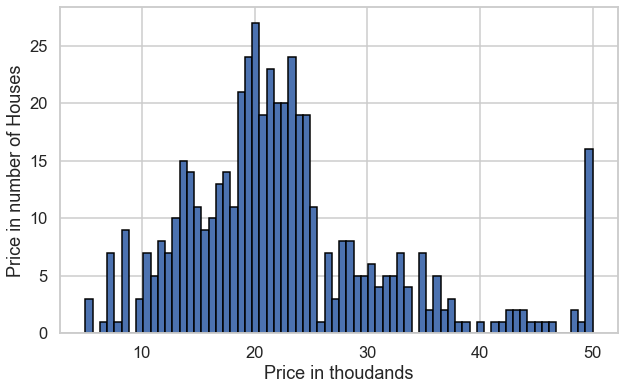

In [139]:
plt.figure(figsize=(10,6))
plt.hist(data['PRICE'],bins = 70,ec='black')
plt.xlabel('Price in thoudands')
plt.ylabel('Price in number of Houses')
plt.show()

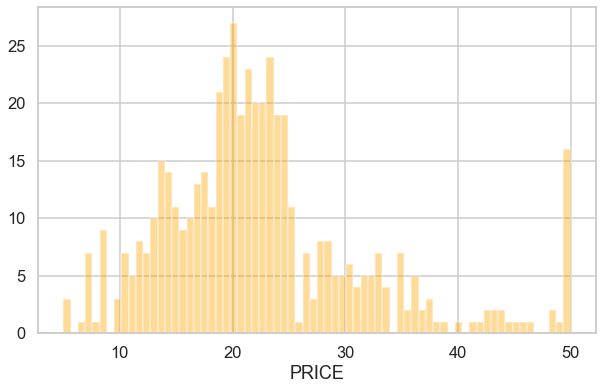

In [140]:
plt.figure(figsize=(10,6))
sns.distplot(data['PRICE'], bins=70 , hist=True, kde=False, color='orange')
plt.show()

In [141]:
average_Room = data['RM']

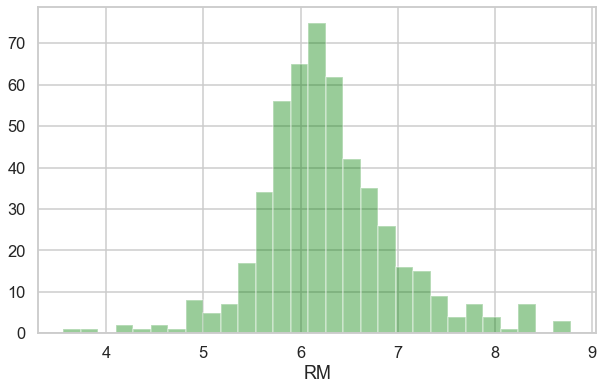

In [142]:
average_Room
plt.figure(figsize=(10,6))
sns.distplot(average_Room, hist=True, kde=False, color='green')
plt.show()

In [143]:
average_Room.mean()

6.284634387351779

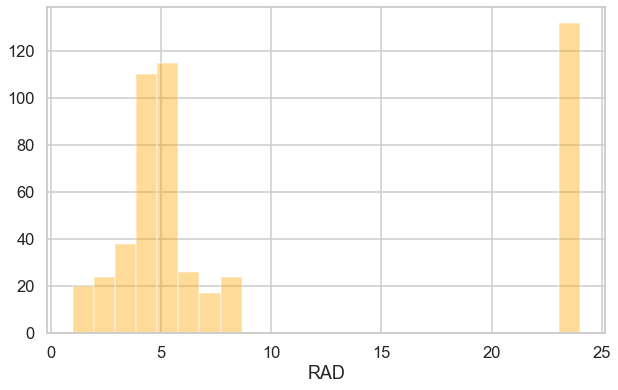

In [144]:
plt.figure(figsize=(10,6))
sns.distplot(data['RAD'], bins=24 , hist=True, kde=False, color='orange')
plt.show()

In [145]:
#selecting and 
data['RAD'].value_counts()

24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
8.0      24
2.0      24
1.0      20
7.0      17
Name: RAD, dtype: int64

In [146]:
freqeuncy = data['RAD'].value_counts()
#type(freqeuncy)
#freqeuncy.index
freqeuncy.axes[0]

Float64Index([24.0, 5.0, 4.0, 3.0, 6.0, 8.0, 2.0, 1.0, 7.0], dtype='float64')

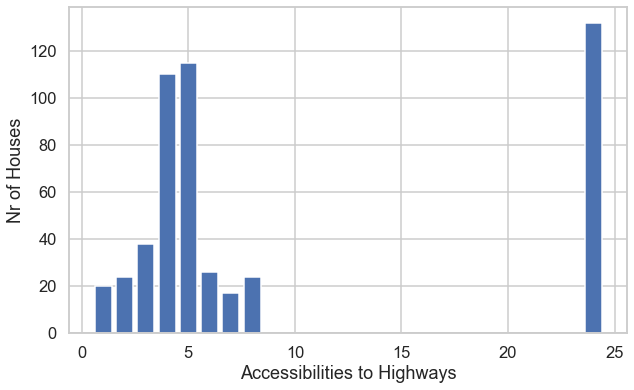

In [147]:
plt.figure(figsize=(10,6))
plt.bar(freqeuncy.index, freqeuncy)
plt.xlabel('Accessibilities to Highways')
plt.ylabel('Nr of Houses')
plt.show()

## Descriptive Statics

In [148]:
data['PRICE'].min()

5.0

In [149]:
data['PRICE'].max()

50.0

In [150]:
data.min()

CRIM         0.00632
ZN           0.00000
INDUS        0.46000
CHAS         0.00000
NOX          0.38500
RM           3.56100
AGE          2.90000
DIS          1.12960
RAD          1.00000
TAX        187.00000
PTRATIO     12.60000
B            0.32000
LSTAT        1.73000
PRICE        5.00000
dtype: float64

In [151]:
data.max()

CRIM        88.9762
ZN         100.0000
INDUS       27.7400
CHAS         1.0000
NOX          0.8710
RM           8.7800
AGE        100.0000
DIS         12.1265
RAD         24.0000
TAX        711.0000
PTRATIO     22.0000
B          396.9000
LSTAT       37.9700
PRICE       50.0000
dtype: float64

In [152]:
data.mean()

CRIM         3.613524
ZN          11.363636
INDUS       11.136779
CHAS         0.069170
NOX          0.554695
RM           6.284634
AGE         68.574901
DIS          3.795043
RAD          9.549407
TAX        408.237154
PTRATIO     18.455534
B          356.674032
LSTAT       12.653063
PRICE       22.532806
dtype: float64

In [153]:
data.median()

CRIM         0.25651
ZN           0.00000
INDUS        9.69000
CHAS         0.00000
NOX          0.53800
RM           6.20850
AGE         77.50000
DIS          3.20745
RAD          5.00000
TAX        330.00000
PTRATIO     19.05000
B          391.44000
LSTAT       11.36000
PRICE       21.20000
dtype: float64

In [154]:
data.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT       PRICE  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

In [155]:
#correlation , positive and negative correlations
# calculated as number between - 01. and 1.0
#strong and Direction of the Movement


## Correlation
## $$ \rho_{XY} = corr(X,Y)$$
## $$ -0.1 \leq \rho _{XY}\leq + 1.0)$$



In [156]:
# the correlation between average house price and room
data['PRICE'].corr(data['RM'])


0.6953599470715393

In [157]:
# the correlation between average house price and people teache ratio
data['PRICE'].corr(data['PTRATIO'])

-0.5077866855375616

In [158]:
# the correlation between average house price and room
#pearson correlation coef.
data.corr() 

CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 -0.356977  0.048788 -0.380051  0.128069 -0.273534   
LSTAT    0.455621 -0.412995  0.603800 -0.053929  0.590879 -0.613808  0.602339   
PRICE   -0.388305  0.360445 -0.483725  0.175260 -0.427321  0.695360 -0.376955   

              DIS       RAD       TAX   PTRATIO         B     LSTAT     PRICE  
CRIM    -0.379670  0.625505  0.582764  0.289946 -0.385064  0.455621 -0.388305  
ZN       0.664408 -0.311948 -0.314563 -0.391679  0.175520 -0.412995  0.360445  
INDUS   -0.708027  0.595129  0.720760  0.383248 -0.356977  0.603800 -0.483725  
CHAS    -0.099176 -0.007368 -0.035587 -0.121515  0.048788 -0.053929  0.175260  
NOX     -0.769230  0.611441  0.668023  0.188933 -0.380051  0.590879 -0.427321  
RM       0.205246 -0.209847 -0.292048 -0.355501  0.128069 -0.613808  0.695360  
AGE     -0.747881  0.456022  0.506456  0.261515 -0.273534  0.602339 -0.376955  
DIS      1.000000 -0.494588 -0.534432 -0.232471  0.291512 -0.496996  0.249929  
RAD     -0.494588  1.000000  0.910228  0.464741 -0.444413  0.488676 -0.381626  
TAX     -0.534432  0.910228  1.000000  0.460853 -0.441808  0.543993 -0.468536  
PTRATIO -0.232471  0.464741  0.460853  1.000000 -0.177383  0.374044 -0.507787  
B        0.291512 -0.444413 -0.441808 -0.177383  1.000000 -0.366087  0.333461  
LSTAT   -0.496996  0.488676  0.543993  0.374044 -0.366087  1.000000 -0.737663  
PRICE    0.249929 -0.381626 -0.468536 -0.507787  0.333461 -0.737663  1.000000

In [159]:
# filtering on the values of the arrays
mask = np.zeros_like(data.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True

In [160]:
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

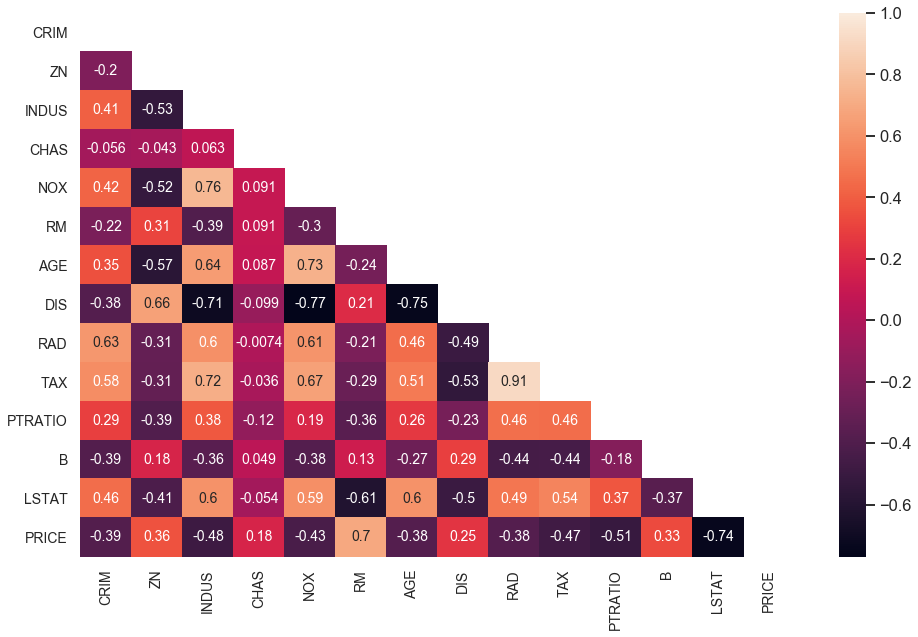

In [161]:
plt.figure(figsize=(16,10))
sns.heatmap(data.corr(), mask= mask,annot=True, annot_kws={"size":14})
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

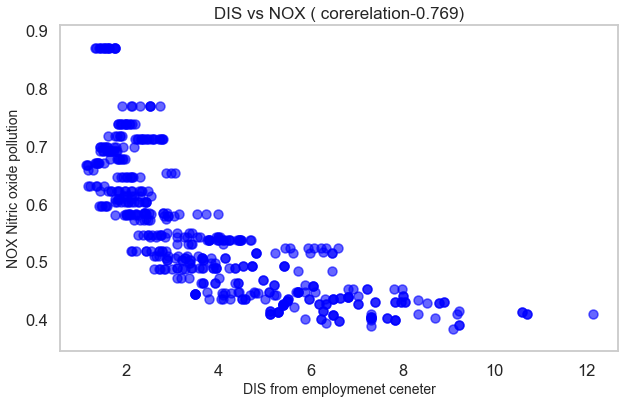

In [162]:
## 3 Chart: Derivative (Close Up)
nox_dis_corr = round(data['NOX'].corr(data['DIS']),3)

plt.figure(figsize=(10,6))
plt.grid()
plt.title(f"DIS vs NOX ( corerelation{nox_dis_corr})", fontsize=17)
plt.xlabel('DIS from employmenet ceneter', fontsize=14)
plt.ylabel('NOX Nitric oxide pollution', fontsize=14)
plt.scatter(x=data['DIS'],y=data['NOX'], color='blue', s=80, alpha=0.6, )
plt.show()

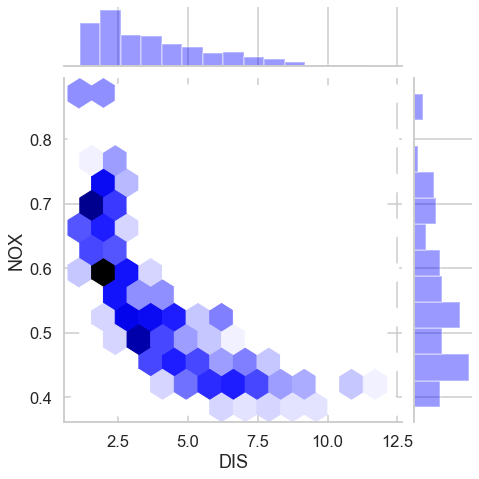

In [163]:
sns.set()
sns.set_context('talk')
sns.set_style('whitegrid')
sns.jointplot(x=data['DIS'],y=data['NOX'],height=7, color='blue',kind='hex')
plt.show()

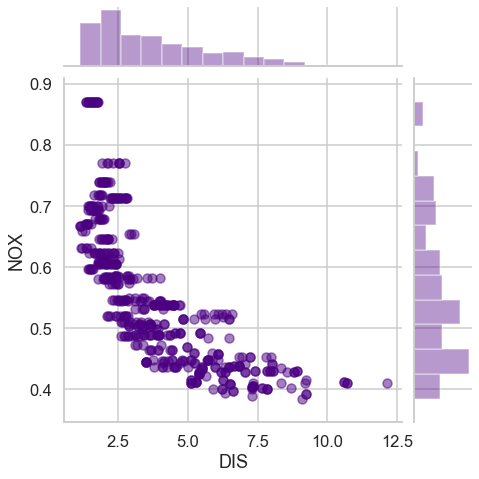

In [164]:
sns.set()
sns.set_context('talk')
sns.set_style('whitegrid')
sns.jointplot(x=data['DIS'],y=data['NOX'],height=7, color='indigo',joint_kws={'alpha':0.5})
plt.show()

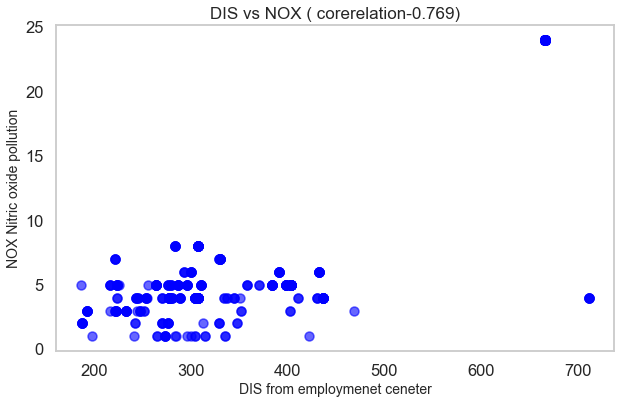

In [165]:
## 3 Chart: Derivative (Close Up)
nox_dis_corr = round(data['NOX'].corr(data['DIS']),3)

plt.figure(figsize=(10,6))
plt.grid()
plt.title(f"DIS vs NOX ( corerelation{nox_dis_corr})", fontsize=17)
plt.xlabel('DIS from employmenet ceneter', fontsize=14)
plt.ylabel('NOX Nitric oxide pollution', fontsize=14)
plt.scatter(x=data['TAX'],y=data['RAD'], color='blue', s=80, alpha=0.6, )
plt.show()

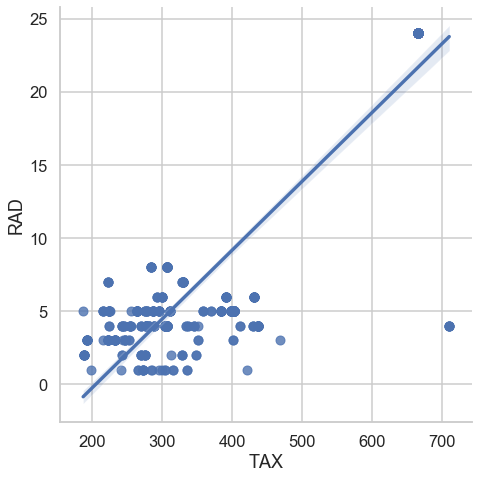

In [166]:
sns.lmplot(x='TAX', y='RAD', data=data,height=7)
plt.show()

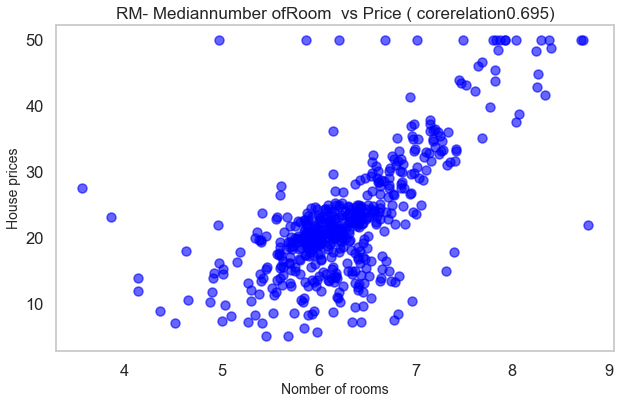

In [167]:
#scatter plot between two other variables 
## 3 Chart: Derivative (Close Up)
rm_tgt_corr = round(data['RM'].corr(data['PRICE']),3)

plt.figure(figsize=(10,6))
plt.grid()
plt.title(f"RM- Mediannumber ofRoom  vs Price ( corerelation{rm_tgt_corr})", fontsize=17)
plt.xlabel('Nomber of rooms', fontsize=14)
plt.ylabel('House prices', fontsize=14)
plt.scatter(x=data['RM'],y=data['PRICE'], color='blue', s=80, alpha=0.6, )
plt.show()

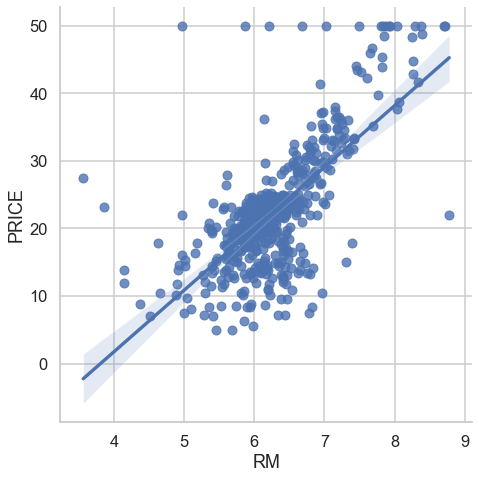

In [168]:
sns.lmplot(x='RM', y='PRICE', data=data,height=7)
plt.show()

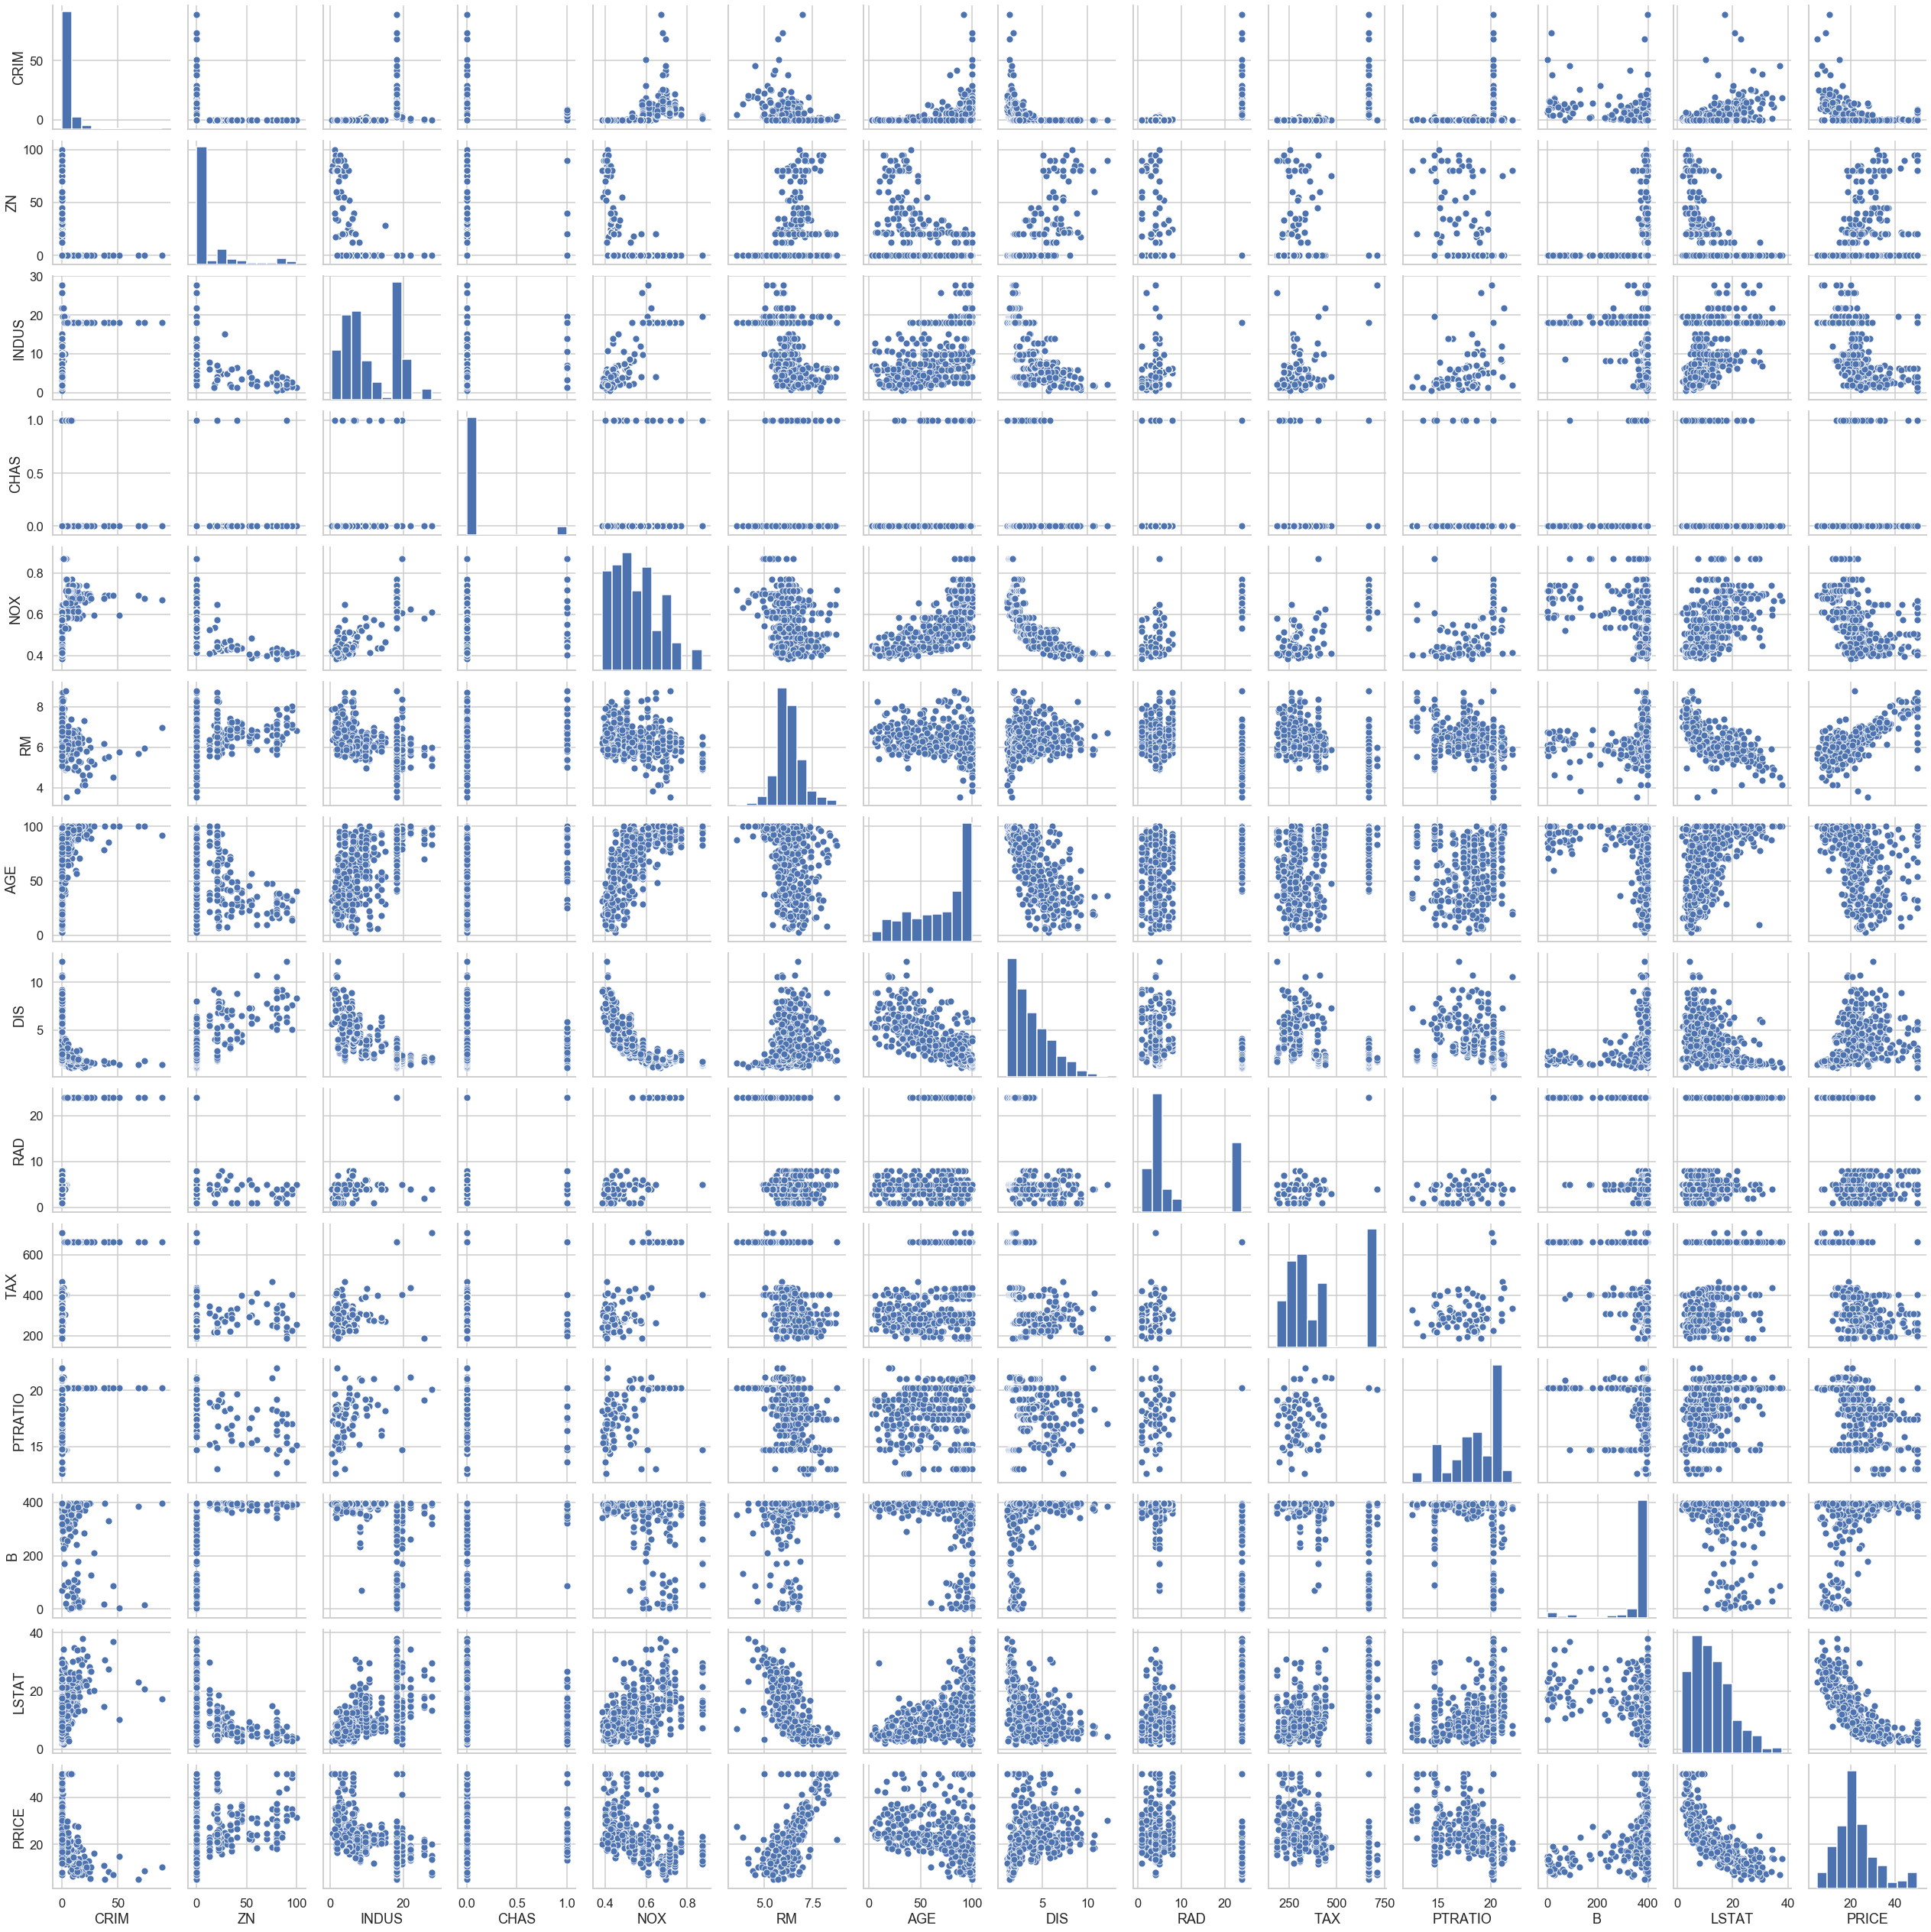

In [169]:
sns.pairplot(data)
plt.show()

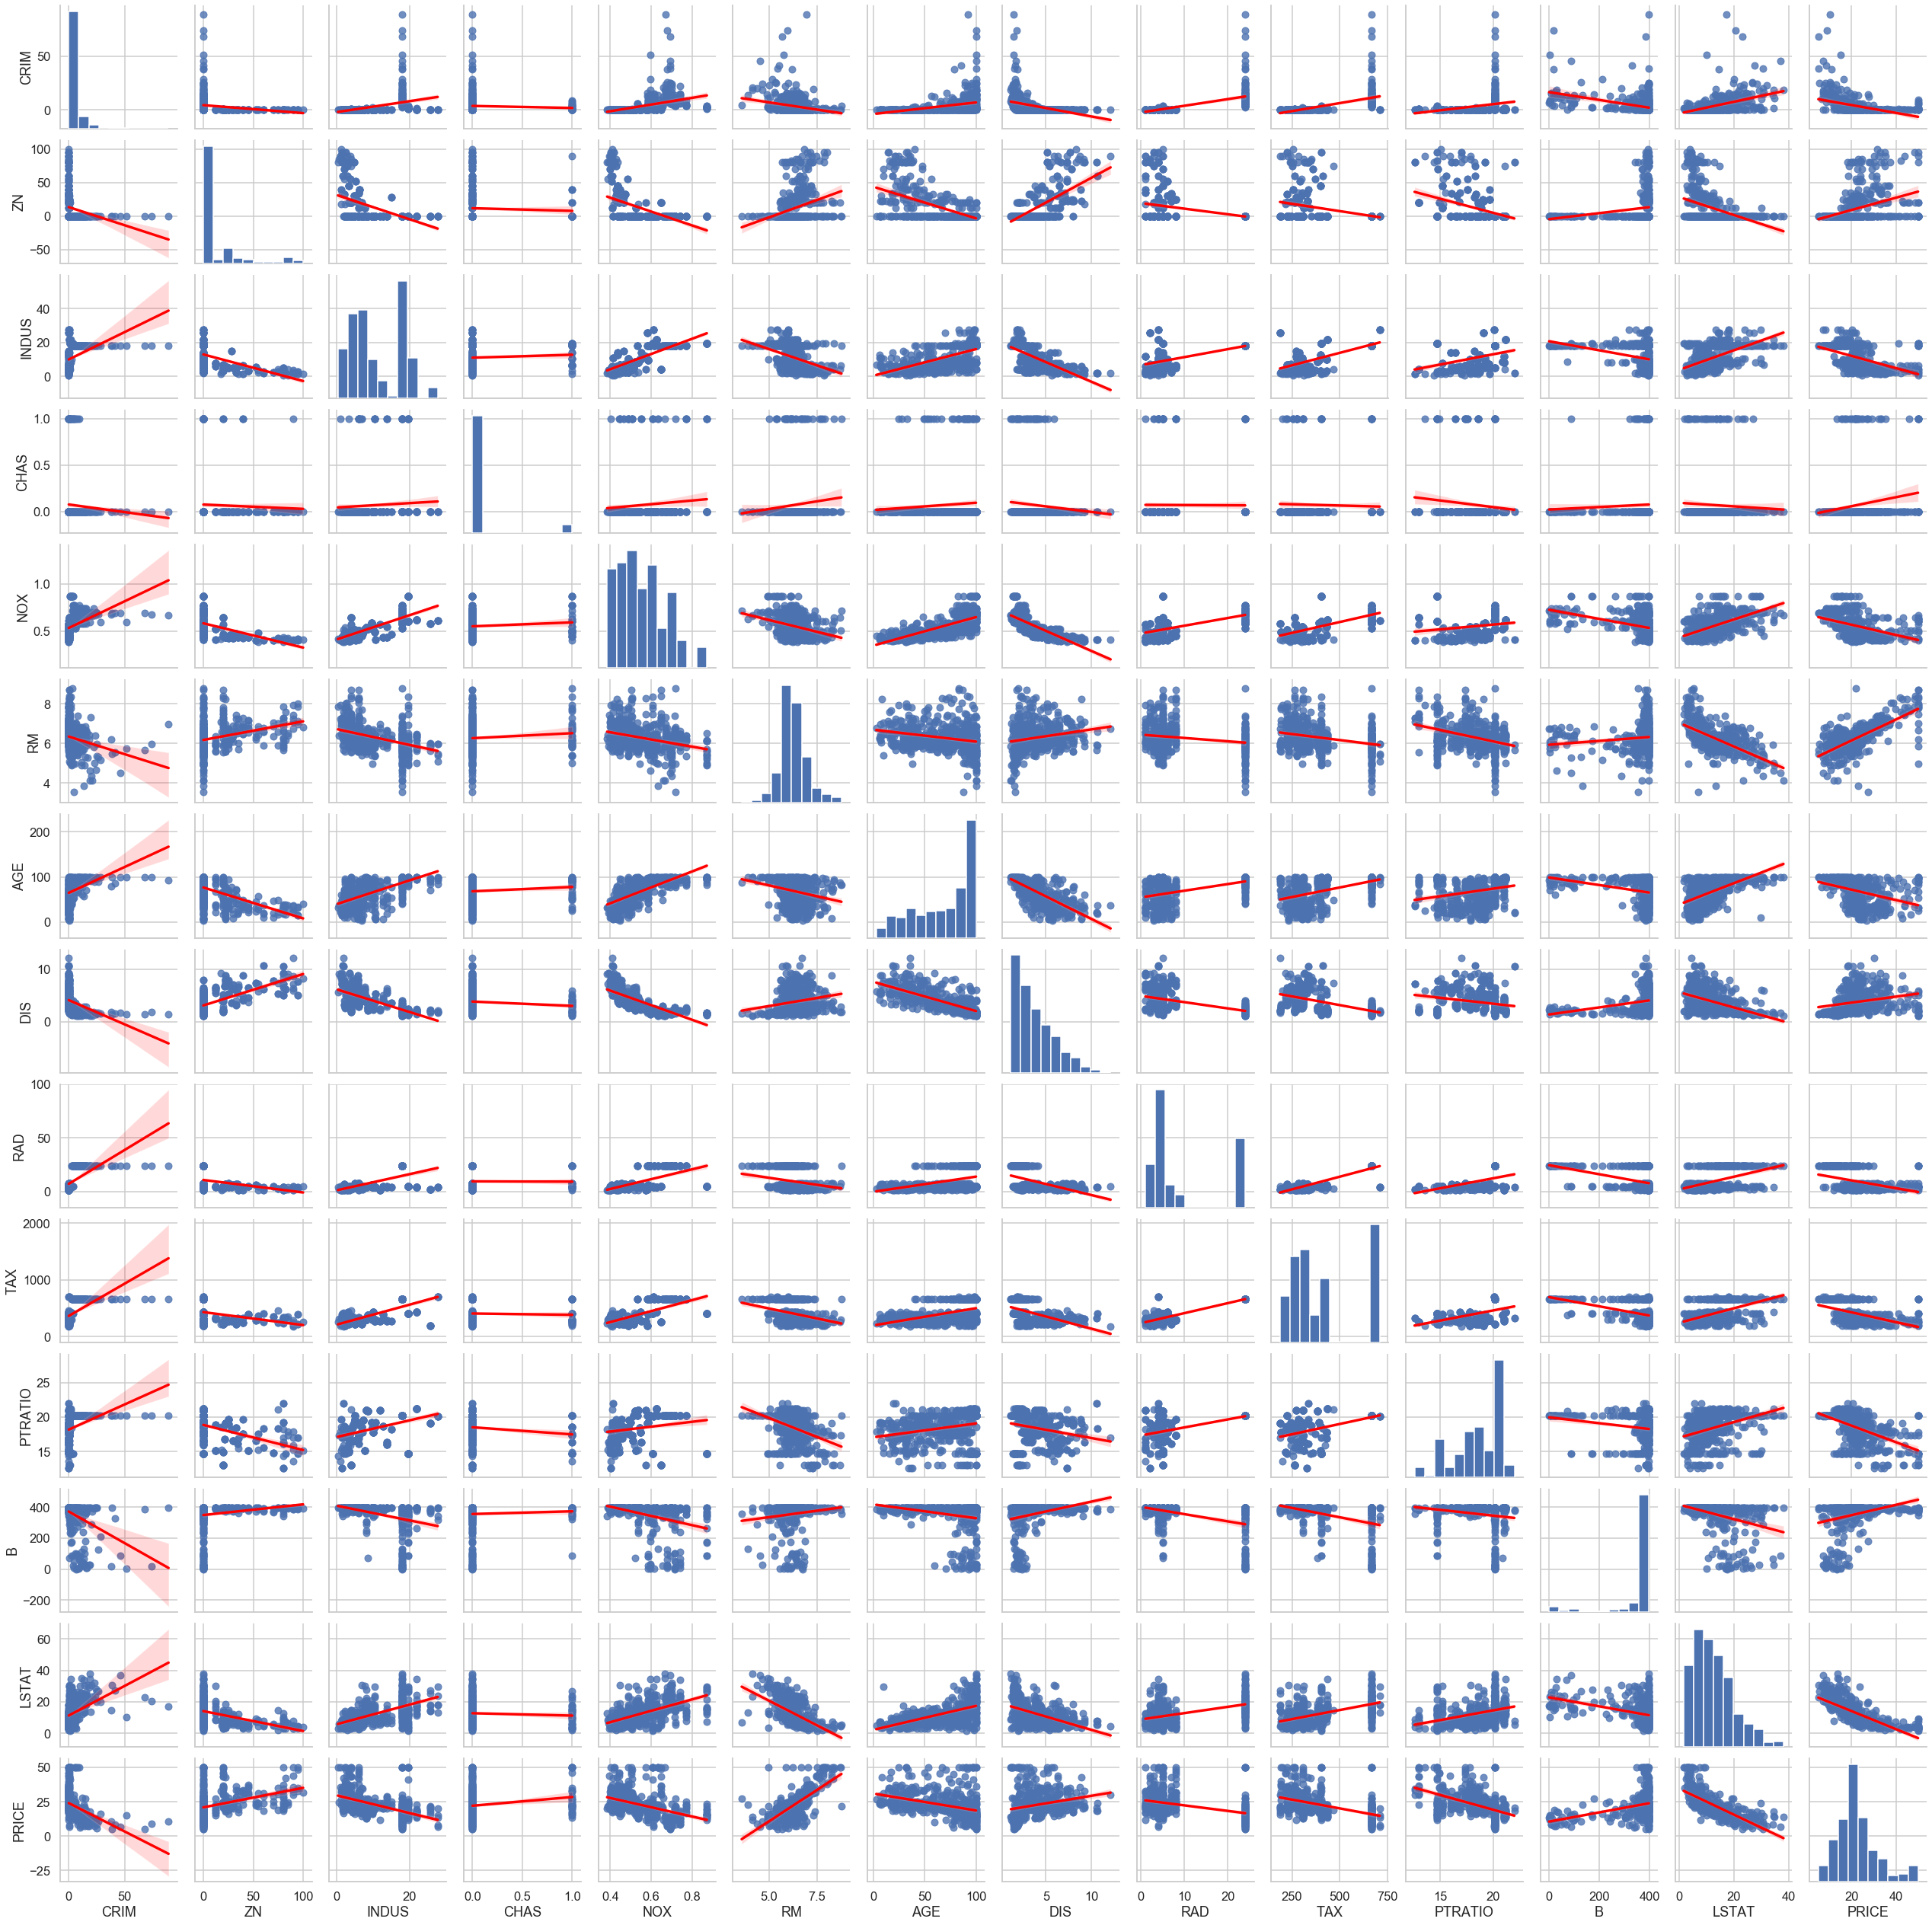

In [170]:
sns.pairplot(data,kind='reg',plot_kws={'line_kws':{'color':'red'}})
plt.show()


## Training & Testing Dataset Split

In [171]:
prices = data['PRICE']
feature = data.drop('PRICE',axis=1)

X_train, X_test, y_train, y_test = train_test_split(feature,prices, 
                                                   test_size=0.2, random_state =10)

# % of training set 
len(X_train)/ len(feature)

0.7984189723320159

In [172]:
# % of test data set
X_test.shape[0] / feature.shape[0]

0.2015810276679842

## Multivariabel regression

In [173]:
regr = LinearRegression()
regr.fit(X_train,y_train)
#Challenge: print out r-squared for training and test database
print('Train data r-squared',regr.score(X_train,y_train))
print('Test data r-squared',regr.score(x_test,y_test))

Train data r-squared 0.750121534530608


NameError: name 'x_test' is not defined

In [ ]:
print('Intercept',regr.intercept_)
pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['coef'])

In [ ]:
#  Data transformations
#calculating the skewness of the data
# when data is skewd you will have to transform it
data['PRICE'].skew()

In [ ]:
y_log = np.log(data['PRICE'])

In [ ]:
y_log.head()

In [ ]:
y_log.tail()

In [ ]:
y_log.skew()

In [ ]:
sns.distplot(y_log)
plt.title(f'Log price with skew {y_log.skew()}')

In [ ]:
sns.lmplot(x='LSTAT', y='PRICE', data=data, height=7,
           scatter_kws={'alpha':0.6},
          line_kws = {'color':'darkred'})

plt.show()

In [ ]:
transformed_data  = feature
transformed_data['LOG_PRICE']  = y_log

sns.lmplot(x='LSTAT', y='LOG_PRICE', data=transformed_data, height=7,
           scatter_kws={'alpha':0.6},
          line_kws = {'color':'cyan'})

plt.show()

## Regression Using log prices

In [ ]:
prices = np.log(data['PRICE']) # Use log prices
feature = data.drop(['PRICE'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(feature,prices, 
                                                   test_size=0.2, random_state =10)


regr = LinearRegression()
regr.fit(X_train, y_train)

#Challenge: print out r-squared for training and test database
print('Train data r-squared',regr.score(X_train,y_train))
print('Test data r-squared',regr.score(x_test,y_test))

In [ ]:
print('Intercept',regr.intercept_)
pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['coef'])

In [ ]:
#getting the log back
np.e** 0.080331

## P-values and evaluatig co-efficients

In [ ]:
X_incl_const = sm.add_constant(X_train)

model = sm.OLS(y_train, X_incl_const)
results = model.fit()

#results.params
#results.pvalues

pd.DataFrame({'coef':results.params, 'p-values':round(results.pvalues,3)})

##  Testing for Multicollinearity

$$TAX = \alpha_0 + \alpha_ 1 RM + \alpha_2 NOX + ... + \alpha_{12}LSTAT $$
$$ VIF _{TAX} = \frac{1}{(1 - R _{TAX}^2)}$$

In [ ]:
variance_inflation_factor(exog=X_incl_const.values, exog_idx = 1)

In [ ]:
len(X_incl_const.columns)

In [ ]:
X_incl_const.shape[1]

In [ ]:
X_incl_const

for i in range(X_incl_const.shape[1]):
    varIF = variance_inflation_factor(exog=X_incl_const.values,exog_idx = i)
    print(varIF)

In [ ]:
#vif above 10 thresehold is a problme while some academic prefer 5
vif =[]

for i in range(X_incl_const.shape[1]):
    varIF = variance_inflation_factor(exog=X_incl_const.values,exog_idx = i)
    vif.append(varIF)
print(vif)

In [ ]:
vif =[variance_inflation_factor(exog=X_incl_const.values,exog_idx = i) 
      for i in range(X_incl_const.shape[1])]
print(vif)

In [ ]:
pd.DataFrame({'coef_name':X_incl_const.columns,
              'vif':np.round(vif,2)}) 

## simplify the models
## feature selction in #  BIC bysian Information Criterion


In [ ]:
# Original model with log proces and all features

X_incl_const = sm.add_constant(X_train)

model = sm.OLS(y_train, X_incl_const)
results = model.fit()

#results.params
#results.pvalues

original_coef = pd.DataFrame({'coef':results.params, 'p-values':round(results.pvalues,3)})

# challenge
print('BIC is', results.bic )
print('BIC is', results.rsquared)

In [ ]:
# Reduced  model # exludeing INDUX
X_incl_const = sm.add_constant(X_train)
X_incl_const = X_incl_const.drop(['INDUS'], axis=1)

model = sm.OLS(y_train, X_incl_const)
results = model.fit()

#results.params
#results.pvalues

coef_minus_indus = pd.DataFrame({'coef':results.params, 'p-values':round(results.pvalues,3)})

# challenge
print('BIC is', results.bic )
print('BIC is', results.rsquared)

In [ ]:
# Reduced  model # exludeing INDUX and AGE
X_incl_const = sm.add_constant(X_train)
X_incl_const = X_incl_const.drop(['INDUS','AGE'], axis=1)


X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_incl_const)
results = model.fit()

#results.params
#results.pvalues

reduced_coef = pd.DataFrame({'coef':results.params, 'p-values':round(results.pvalues,3)})

# challenge
print('BIC is', results.bic )
print('BIC is', results.rsquared)

In [ ]:
frames = [coef_minus_indus,reduced_coef,original_coef]
pd.concat(frames,axis=1)

## Residuals and Residual plots

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


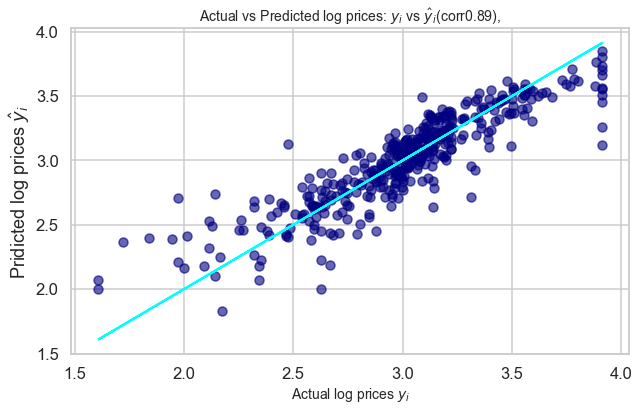

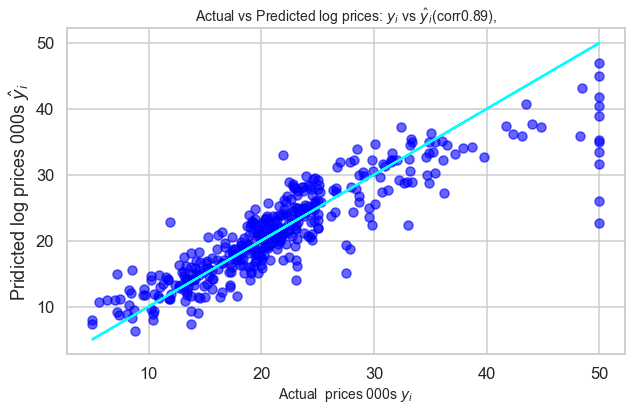

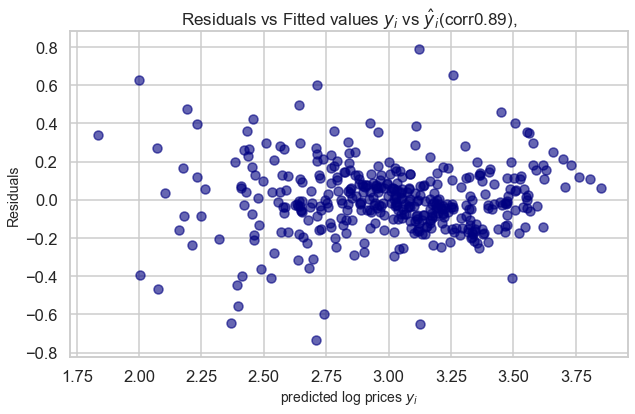

In [176]:
#Modified model: Tranfommed (using log prices) & simplified (dropping )
prices = np.log(data['PRICE']) # Use log prices
feature = data.drop(['PRICE','INDUS','AGE'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(feature,prices, 
                                                   test_size=0.2, random_state =10)

#using stats model
X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_incl_const)
results = model.fit()

residuals = y_train - results.fittedvalues
# residual are pandas series so you can use pands 
#residuals.describe()

# graspg of actual a VS predicted values
corr =round(y_train.corr(results.fittedvalues),2)
plt.figure(figsize=(10,6))
plt.scatter(x = y_train, y = results.fittedvalues, c='navy', alpha =0.6)
plt.plot(y_train, y_train , color='cyan')
plt.xlabel('Actual log prices $y _i$', fontsize = 14)
plt.ylabel('Pridicted log prices $\hat y _i$')
plt.title(f'Actual vs Predicted log prices: $y_i$ vs $\hat y_i$(corr{corr}),',fontsize = 14)
plt.show()


# graspg of actual a VS predicted values
plt.figure(figsize=(10,6))
plt.scatter(x = np.e**y_train, y = np.e**results.fittedvalues, c='blue', alpha =0.6)
plt.plot(np.e**y_train, np.e**y_train , color='cyan')
plt.xlabel('Actual  prices 000s $y _i$', fontsize = 14)
plt.ylabel('Pridicted log prices 000s $\hat y _i$')
plt.title(f'Actual vs Predicted log prices: $y_i$ vs $\hat y_i$(corr{corr}),',fontsize = 14)
plt.show()

# graspg of actual a VS predicted values
plt.figure(figsize=(10,6))
plt.scatter(x = results.fittedvalues, y =results.resid, c='Navy', alpha =0.6)
plt.xlabel('predicted log prices $y _i$', fontsize = 14)
plt.ylabel('Residuals', fontsize = 14)
plt.title(f'Residuals vs Fitted values $y_i$ vs $\hat y_i$(corr{corr}),',fontsize = 17)
plt.show()

# Mean squared Error & R-Squared
reduced_log_mse = round(results.mse_resid,3)
reduced_log_rsquared = round(results.rsquared,3)

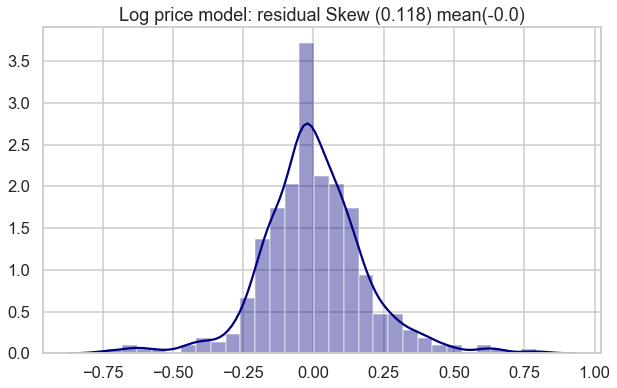

In [177]:
resid_mean = round(results.resid.mean(),3)
resid_skew = round(results.resid.skew(),3)

plt.figure(figsize=(10,6))
sns.distplot(results.resid, color='navy')
plt.title(f'Log price model: residual Skew ({resid_skew}) mean({resid_mean})')
plt.show()

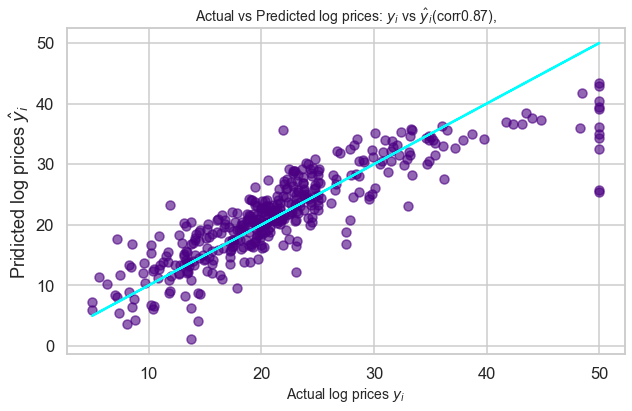

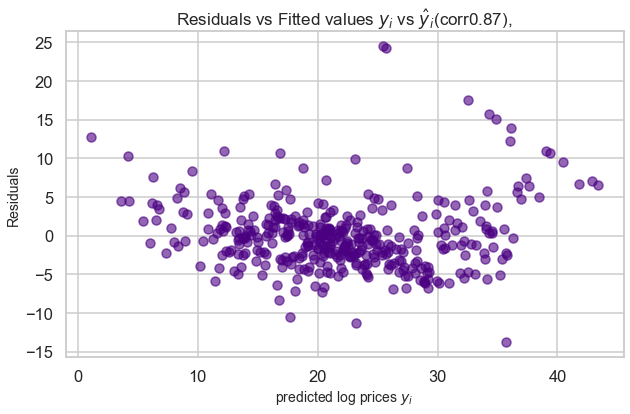

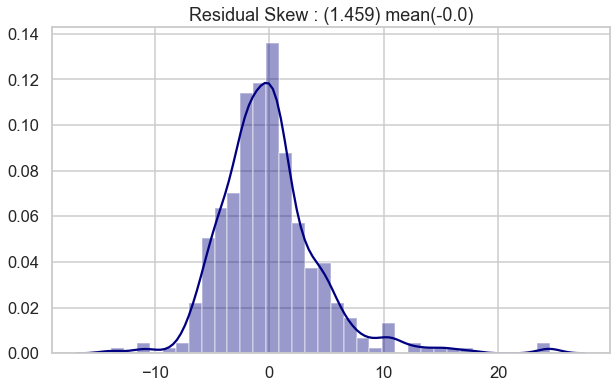

In [178]:
#Original model: Tranfommed (using log prices) & simplified (dropping )
prices = (data['PRICE']) # Use log prices
feature = data.drop(['PRICE'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(feature,prices, 
                                                   test_size=0.2, random_state =10)

#using stats model
X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_incl_const)
results = model.fit()

residuals = y_train - results.fittedvalues
# residual are pandas series so you can use pands 
#residuals.describe()

# graspg of actual a VS predicted values
corr =round(y_train.corr(results.fittedvalues),2)
plt.figure(figsize=(10,6))
plt.scatter(x = y_train, y = results.fittedvalues, c='indigo', alpha =0.6)
plt.plot(y_train, y_train , color='cyan')
plt.xlabel('Actual log prices $y _i$', fontsize = 14)
plt.ylabel('Pridicted log prices $\hat y _i$')
plt.title(f'Actual vs Predicted log prices: $y_i$ vs $\hat y_i$(corr{corr}),',fontsize = 14)
plt.show()


plt.figure(figsize=(10,6))
plt.scatter(x = results.fittedvalues, y =results.resid, c='indigo', alpha =0.6)
plt.xlabel('predicted log prices $y _i$', fontsize = 14)
plt.ylabel('Residuals', fontsize = 14)
plt.title(f'Residuals vs Fitted values $y_i$ vs $\hat y_i$(corr{corr}),',fontsize = 17)
plt.show()


# Residual distribution Graph of actual a VS predicted values.


resid_mean = round(results.resid.mean(),3)
resid_skew = round(results.resid.skew(),3)

plt.figure(figsize=(10,6))
sns.distplot(results.resid, color='navy')
plt.title(f'Residual Skew : ({resid_skew}) mean({resid_mean})')
plt.show()



# Mean squared Error & R-Squared
full_normal_mse = round(results.mse_resid,3)
full_normal_rsquared = round(results.rsquared,3)

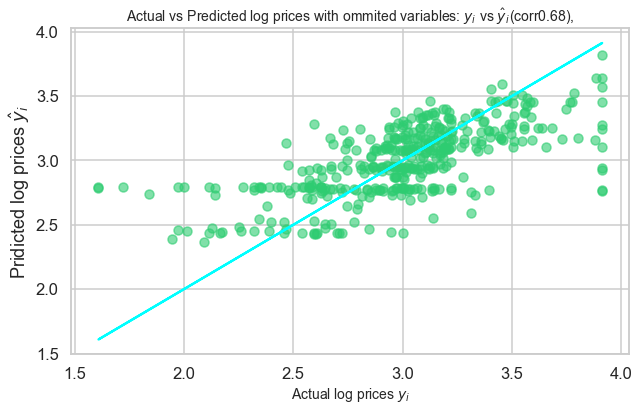

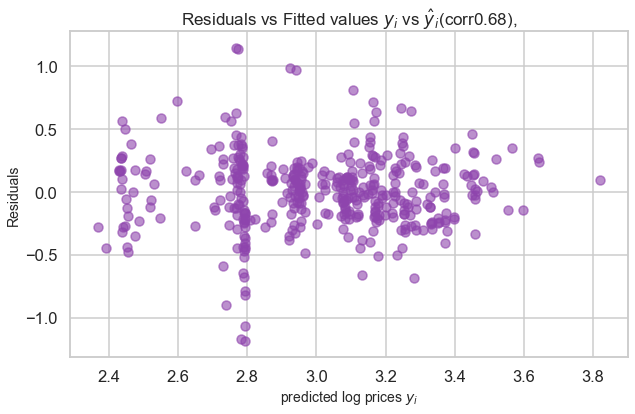

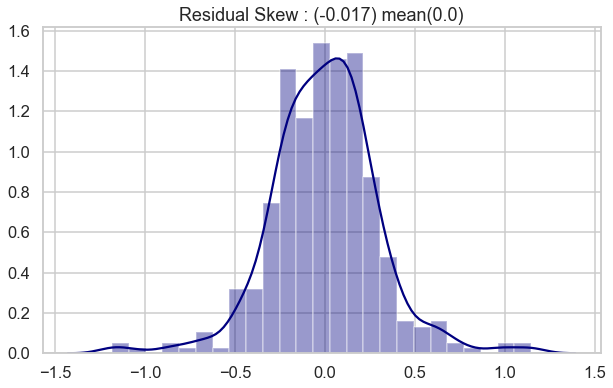

In [179]:
#model ommiting key feayures using log prices: Tranfommed (using log prices) & simplified (dropping )
prices = np.log(data['PRICE']) # Use log prices
feature = data.drop(['PRICE', 'INDUS','AGE','LSTAT','RM','NOX','CRIM'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(feature,prices, 
                                                   test_size=0.2, random_state =10)

#using stats model
X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_incl_const)
results = model.fit()

residuals = y_train - results.fittedvalues
# residual are pandas series so you can use pands 
#residuals.describe()

# graspg of actual a VS predicted values
corr =round(y_train.corr(results.fittedvalues),2)
plt.figure(figsize=(10,6))
plt.scatter(x = y_train, y = results.fittedvalues, c='#2ecc71', alpha =0.6)
plt.plot(y_train, y_train , color='cyan')
plt.xlabel('Actual log prices $y _i$', fontsize = 14)
plt.ylabel('Pridicted log prices $\hat y _i$')
plt.title(f'Actual vs Predicted log prices with ommited variables: $y_i$ vs $\hat y_i$(corr{corr}),',fontsize = 14)
plt.show()


plt.figure(figsize=(10,6))
plt.scatter(x = results.fittedvalues, y =results.resid, c='#8e44ad', alpha =0.6)
plt.xlabel('predicted log prices $y _i$', fontsize = 14)
plt.ylabel('Residuals', fontsize = 14)
plt.title(f'Residuals vs Fitted values $y_i$ vs $\hat y_i$(corr{corr}),',fontsize = 17)
plt.show()


# Residual distribution Graph of actual a VS predicted values.


resid_mean = round(results.resid.mean(),3)
resid_skew = round(results.resid.skew(),3)

plt.figure(figsize=(10,6))
sns.distplot(results.resid, color='navy')
plt.title(f'Residual Skew : ({resid_skew}) mean({resid_mean})')
plt.show()



# Mean squared Error & R-Squared
omitted_var_mse = round(results.mse_resid,3)
omitted_var_rsquared = round(results.rsquared,3)


In [180]:
# Mean squared Error & R-Squared

pd.DataFrame({'R-Squared':[reduced_log_rsquared,full_normal_rsquared,omitted_var_rsquared], 
             'MSE':[reduced_log_mse,full_normal_mse,omitted_var_mse],
             'RMSE':np.sqrt([reduced_log_mse,full_normal_mse,omitted_var_mse])},
            index=['Reduced Log Model','Full Nrmal Proce Model','Ommited Var Model'])

R-Squared     MSE      RMSE
Reduced Log Model           0.792   0.035  0.187083
Full Nrmal Proce Model      0.750  19.921  4.463295
Ommited Var Model           0.460   0.090  0.300000

# Making a predition and a forcast
# RMSE

In [181]:
# Calculate the upper and lower bound
# for a 95% prediction interval using the reduced the log model.

print('1.s.d in log prices is', np.sqrt(reduced_log_mse))
print('2.s.d in log prices is', 2*np.sqrt(reduced_log_mse))

upper_bound = np.log(30) + 2*np.sqrt(reduced_log_mse)
print('The upper bound in log prices for 95% prediction interval is ',upper_bound)
print('The upper bound inormal prices is $',np.e**upper_bound * 1000)


lower_bound = np.log(30) - 2*np.sqrt(reduced_log_mse)
print('The upper bound in log prices for 95% prediction interval is ',lower_bound)
print('The upper bound inormal prices is $',np.e**lower_bound * 1000)

1.s.d in log prices is 0.18708286933869708
2.s.d in log prices is 0.37416573867739417
The upper bound in log prices for 95% prediction interval is  3.7753631203395495
The upper bound inormal prices is $ 43613.34233239937
The upper bound in log prices for 95% prediction interval is  3.0270316429847615
The upper bound inormal prices is $ 20635.886906824155
